In [49]:
import numpy as np
from qiskit.quantum_info import random_unitary, Operator
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag


In [15]:
SWAP = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
Y = np.array([[0,-1j],[1j, 0]])
I = np.eye(2)

U1 = random_unitary(2).data
U2 = random_unitary(2).data

In [16]:
SWAP @ np.kron(U1,U2) @ SWAP

array([[-0.10540714+0.46342959j,  0.58652334-0.48819773j,
        -0.05455823+0.22498826j,  0.28906496-0.233711j  ],
       [-0.75413122+0.11675937j, -0.41722588-0.22759662j,
        -0.36812153+0.05163258j, -0.20163555-0.11375157j],
       [-0.21770452+0.0787468j ,  0.35446623+0.11195121j,
         0.44918617-0.15527213j, -0.72433577-0.24017566j],
       [-0.24631586-0.27840237j, -0.0165009 -0.23091998j,
         0.49746444+0.57868453j,  0.02711335+0.47449185j]])

In [17]:
np.kron(U2,U1)

array([[-0.10540714+0.46342959j,  0.58652334-0.48819773j,
        -0.05455823+0.22498826j,  0.28906496-0.233711j  ],
       [-0.75413122+0.11675937j, -0.41722588-0.22759662j,
        -0.36812153+0.05163258j, -0.20163555-0.11375157j],
       [-0.21770452+0.0787468j ,  0.35446623+0.11195121j,
         0.44918617-0.15527213j, -0.72433577-0.24017566j],
       [-0.24631586-0.27840237j, -0.0165009 -0.23091998j,
         0.49746444+0.57868453j,  0.02711335+0.47449185j]])

In [19]:
np.kron(X,Y)

array([[0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [20]:
np.kron(Y,X)

array([[0.+0.j, 0.+0.j, 0.-0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.-1.j, 0.-0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [37]:
help(qc)

Help on QuantumCircuit in module qiskit.circuit.quantumcircuit object:

class QuantumCircuit(builtins.object)
 |  QuantumCircuit(*regs, name=None, global_phase=0, metadata=None)
 |  
 |  Create a new circuit.
 |  
 |  A circuit is a list of instructions bound to some registers.
 |  
 |  Args:
 |      regs (list(:class:`Register`) or list(``int``) or list(list(:class:`Bit`))): The
 |          registers to be included in the circuit.
 |  
 |          * If a list of :class:`Register` objects, represents the :class:`QuantumRegister`
 |            and/or :class:`ClassicalRegister` objects to include in the circuit.
 |  
 |            For example:
 |  
 |              * ``QuantumCircuit(QuantumRegister(4))``
 |              * ``QuantumCircuit(QuantumRegister(4), ClassicalRegister(3))``
 |              * ``QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(2, 'qr1'))``
 |  
 |          * If a list of ``int``, the amount of qubits and/or classical bits to include in
 |            the ci

In [46]:
num_qubits = 2
V1 = 'rx'
V2 = 'ry'
qc = QuantumCircuit(num_qubits)
if V1 == 'rx' and V2 == 'ry':
    qc.rz(np.pi, 0)
#c.reverse_qubits()

In [47]:
qc.draw()

┌───────┐
q_0: ┤ Rz(π) ├
     └───────┘
q_1: ─────────

In [48]:
op = Operator(qc).data
op

array([[6.123234e-17-1.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j, 0.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 0.000000e+00+0.j, 6.123234e-17-1.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        6.123234e-17+1.j]])

In [33]:
np.kron(I,Z)

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0., -1.]])

In [32]:
np.kron(Z,I)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0., -1., -0.],
       [ 0.,  0., -0., -1.]])

In [51]:
qc = QuantumCircuit(4)
qc.x(0)
qc.rx(0.69,1)
qc.cry(0.424, 2,3)
qc.rzz(0.20, 3,0)
qc.draw()

┌───┐              
q_0: ────┤ X ├─────■────────
      ┌──┴───┴───┐ │        
q_1: ─┤ Rx(0.69) ├─┼────────
      └──────────┘ │        
q_2: ──────■───────┼────────
     ┌─────┴─────┐ │ZZ(0.2) 
q_3: ┤ Ry(0.424) ├─■────────
     └───────────┘

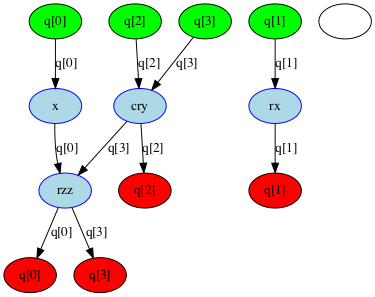

In [52]:
dag_circ = circuit_to_dag(qc)
dag_circ.draw()

In [55]:
for op_node in dag_circ.op_nodes():
    print(op_node.name, op_node.qargs)

x [Qubit(QuantumRegister(4, 'q'), 0)]
rx [Qubit(QuantumRegister(4, 'q'), 1)]
cry [Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)]
rzz [Qubit(QuantumRegister(4, 'q'), 3), Qubit(QuantumRegister(4, 'q'), 0)]


In [56]:
help(op_node)

Help on DAGNode in module qiskit.dagcircuit.dagnode object:

class DAGNode(builtins.object)
 |  DAGNode(type=None, op=None, name=None, qargs=None, cargs=None, wire=None, nid=-1)
 |  
 |  Object to represent the information at a node in the DAGCircuit.
 |  
 |  It is used as the return value from `*_nodes()` functions and can
 |  be supplied to functions that take a node.
 |  
 |  Methods defined here:
 |  
 |  __gt__(self, other)
 |      Return self>value.
 |  
 |  __init__(self, type=None, op=None, name=None, qargs=None, cargs=None, wire=None, nid=-1)
 |      Create a node
 |  
 |  __lt__(self, other)
 |      Return self<value.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  semantic_eq(node1, node2, bit_indices1=None, bit_indices2=None)
 |      Check if DAG nodes are considered equivalent, e.g., as a node_match for nx.is_isomorphic.
 |      
 |      Args:
 |     